In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the diabetes dataset from a CSV file
dataframe = pd.read_csv('/content/drive/MyDrive/diabetes2.csv')

In [4]:
# Print the number of rows in the Diabetes dataset
print('Number of Rows in Diabetes dataset:', dataframe.shape[0])
# Print the number of columns in the Diabetes dataset
print('Number of Columns in Diabetes dataset:', dataframe.shape[1])
# Print the size (total number of elements) of the Diabetes dataset
print('Size of Diabetes dataset is  :',dataframe.size)

Number of Rows in Diabetes dataset: 768
Number of Columns in Diabetes dataset: 9
Size of Diabetes dataset is  : 6912


In [5]:
# Get the column names of the DataFrame
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Remove duplicate rows from the DataFrame
dataframe = dataframe.drop_duplicates()

In [8]:
# Print the shape again to check if there are any duplicate entries
print('Shape of Diabetes dataset is :',dataframe.shape)

Shape of Diabetes dataset is : (768, 9)


In [9]:
# Check for null entries in any columns
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

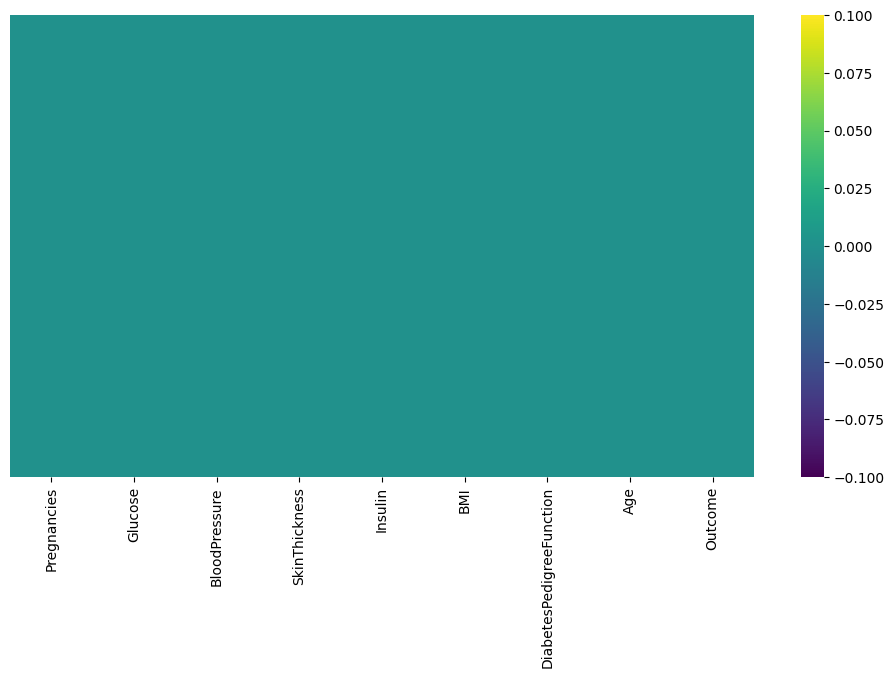

In [10]:
# Create a heatmap to visualize missing values in the DataFrame
plt.figure(figsize=(12, 6))
sns.heatmap(dataframe.isnull(), yticklabels=False, cmap='viridis')

In [11]:
# Display the first five rows of the DataFrame
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

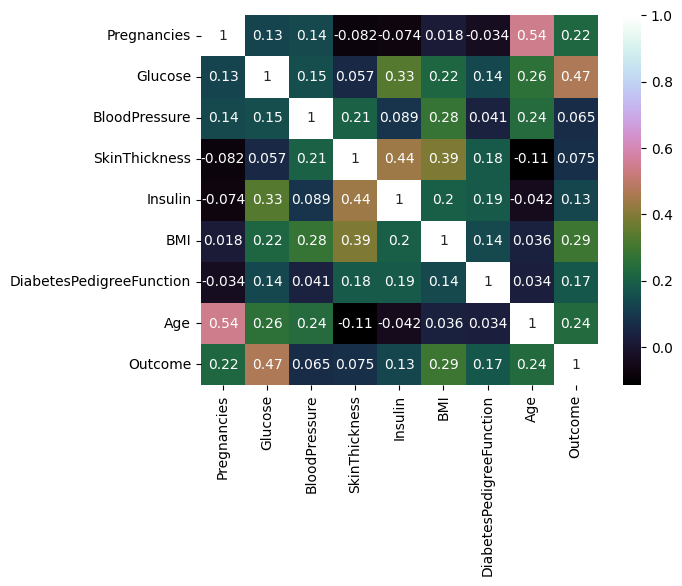

In [12]:
# Calculate the correlation matrix
correlation_matrix = dataframe.corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix')

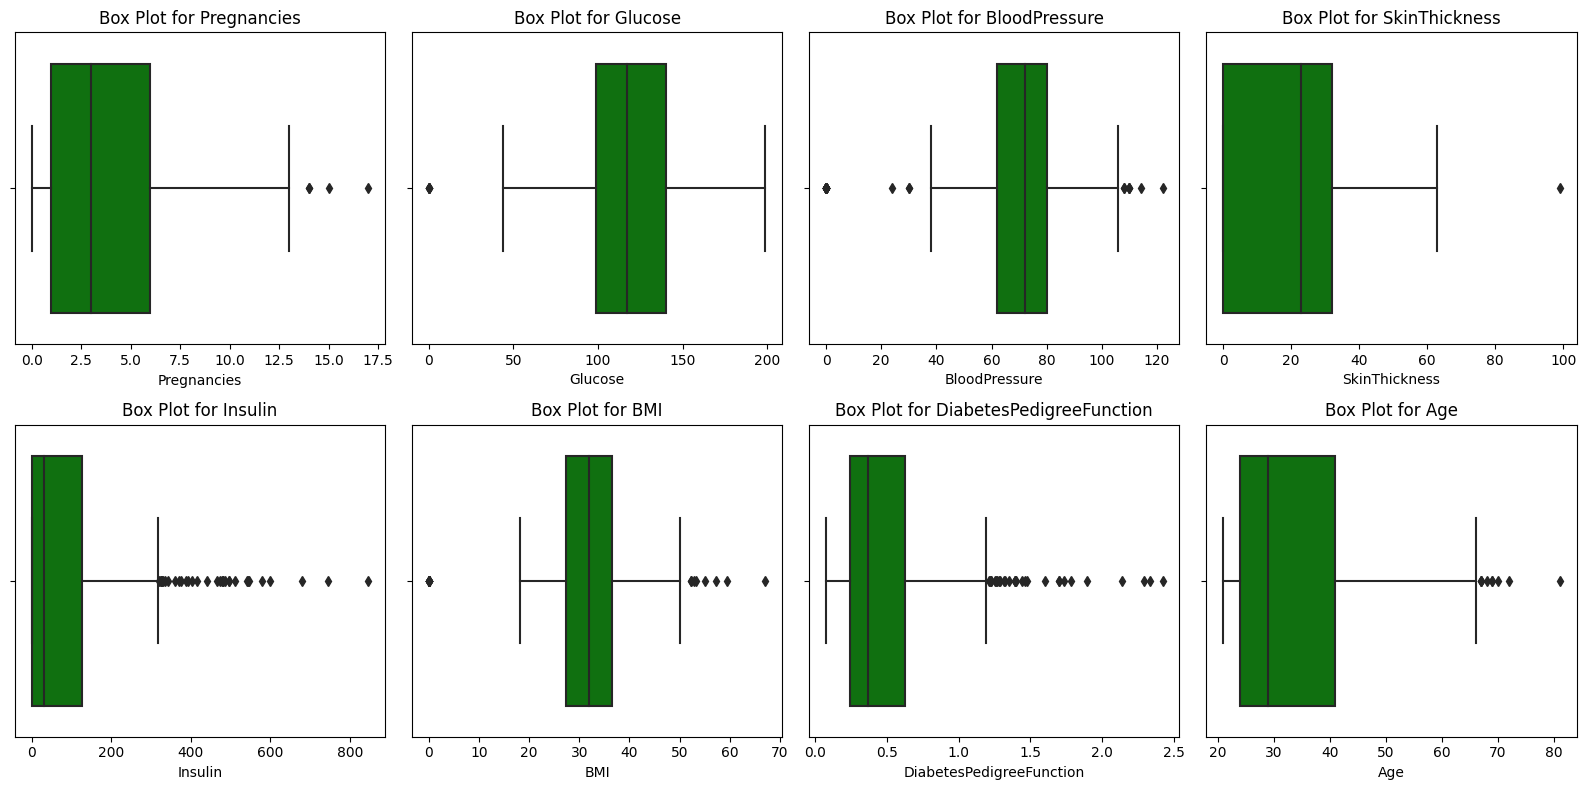

In [6]:
x = dataframe.drop(['Outcome'], axis=1)  # Drop the dependent feature

# Create a larger plot grid for multiple box plots
plt.figure(figsize=(16, 8))

# Iterate through each column in x
for i, column in enumerate(x.columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot in a 2x4 grid
    sns.boxplot(x=column, data=x, color='green', showfliers=True)  # Include outliers
    plt.xlabel(column)
    plt.title(f'Box Plot for {column}')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
x=dataframe
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
# df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


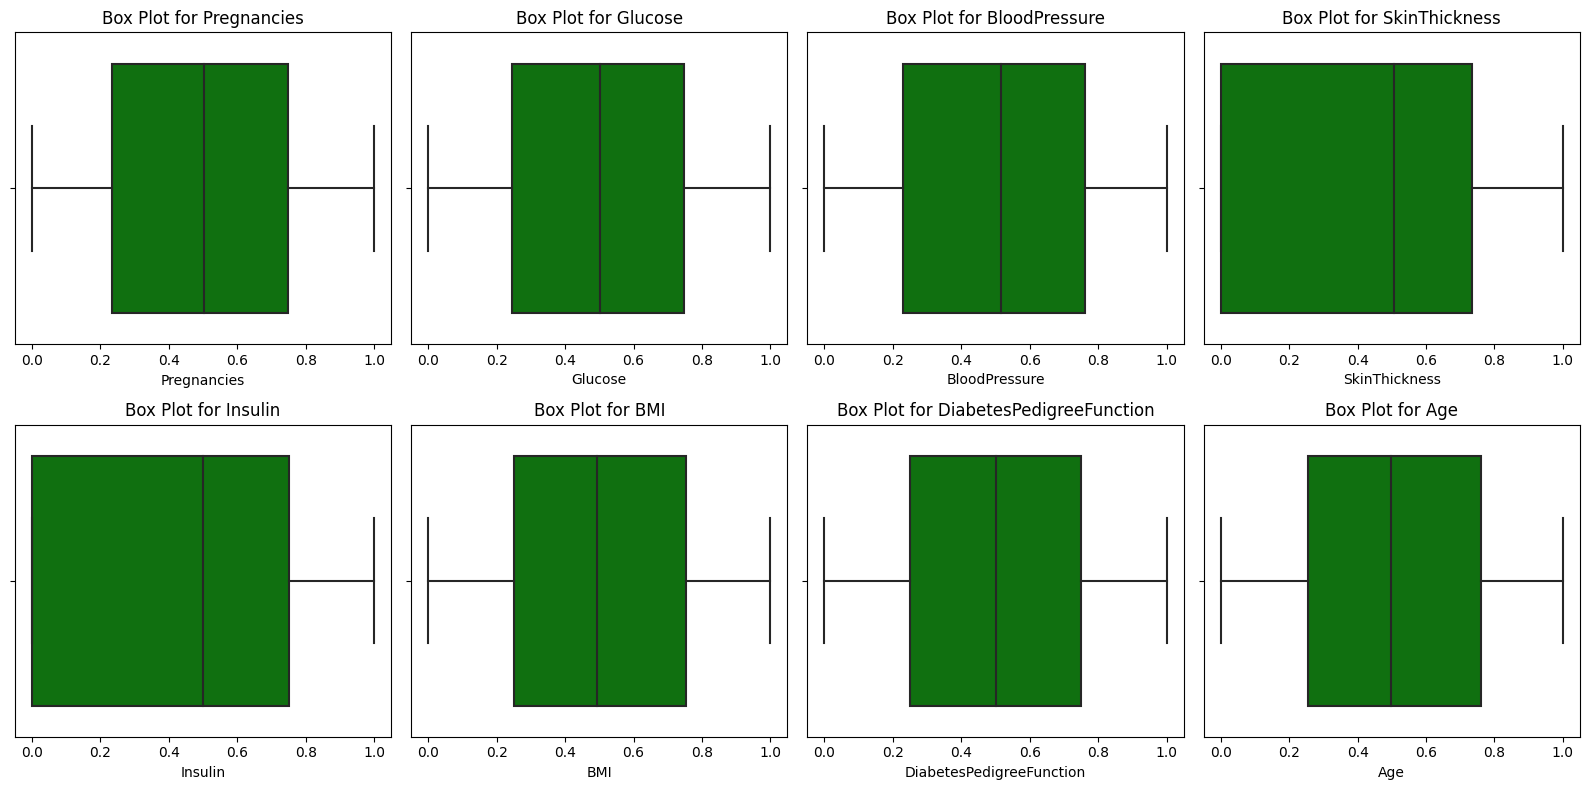

In [8]:
# Drop the 'Outcome' column to focus on independent features
x = df_new.drop(['Outcome'], axis=1)

# Create a larger plot grid for multiple box plots
plt.figure(figsize=(16, 8))

# Iterate through each column in x
for i, column in enumerate(x.columns, 1):
    # Create a subplot in a 2x4 grid
    plt.subplot(2, 4, i)

    # Create a box plot with outliers displayed (showfliers=True)
    sns.boxplot(x=column, data=x, color='green')

    # Set the x-axis label
    plt.xlabel(column)

    # Set the title for the subplot
    plt.title(f'Box Plot for {column}')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
# Extracting independent features (X) by dropping the 'Outcome' column
X = df_new.drop(columns='Outcome', axis=1)

# Extracting the dependent variable (Y) which is 'Outcome'
y = df_new['Outcome']

In [10]:
# Splitting the dataset into training and testing sets
# X_train: features for training, X_test: features for testing
# y_train: labels for training, y_test: labels for testing
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.7, random_state = 12)

In [11]:
X_train.shape, y_train.shape

((537, 8), (537,))

In [19]:
X_test.shape, y_test.shape

((231, 8), (231,))

In [12]:
# Create and train the Logistic Regression model
logic = LogisticRegression()
logic.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logic.predict(X_test)

# Calculate and print the training accuracy
log_train = round(logic.score(X_train, y_train) * 100, 2)
print(f"Training Accuracy: {log_train}%")

# Calculate and print the model accuracy score
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
print(f"Model Accuracy Score: {log_accuracy}%")

# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_lr)
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix:")
print(confusion_mat)
print("\033[1m--------------------------------------------------------\033[0m")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Training Accuracy: 76.54%
Model Accuracy Score: 77.49%
--------------------------------------------------------
Confusion Matrix:
[[127  20]
 [ 32  52]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       147
         1.0       0.72      0.62      0.67        84

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [28]:
# Specify the filename for the saved model
model_filename = "logistic_regression_model.pkl"

# Save the trained Logistic Regression model to a .pkl file
with open(model_filename, 'wb') as model_file:
    pickle.dump(logic, model_file)

In [13]:
input_data = np.array([[3,78,50,32,88,31.000000,0.248000,26]])
predictions = logic.predict(input_data)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted to not have diabetes.")


[1.]
The patient is predicted to have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
param_grid = {
    'C': [0.1, 1, 10],                  # Regularization parameter
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga']     # Optimization algorithm
}

# Create the grid search object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [15]:
logic_tuned = LogisticRegression(**best_params)
logic_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_lr_tuned = logic_tuned.predict(X_test)
log_accuracy_tuned = round(accuracy_score(y_pred_lr_tuned, y_test) * 100, 2)
print("Tuned Model Accuracy:", log_accuracy_tuned)

Tuned Model Accuracy: 76.19


In [16]:
# Create and train the SVC model
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

# Calculate and print the training accuracy
svc_train = round(svc.score(X_train, y_train) * 100, 2)
print(f"Training Accuracy: {svc_train}%")

# Calculate and print the model accuracy score
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
print(f"Model Accuracy Score: {svc_accuracy}%")

# Print the confusion matrix
confusion_mat_svc = confusion_matrix(y_test, y_pred_svc)
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix:")
print(confusion_mat_svc)
print("\033[1m--------------------------------------------------------\033[0m")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Training Accuracy: 81.01%
Model Accuracy Score: 76.62%
--------------------------------------------------------
Confusion Matrix:
[[124  23]
 [ 31  53]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       147
         1.0       0.70      0.63      0.66        84

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate and print the training accuracy
knn_train = round(knn.score(X_train, y_train) * 100, 2)
print(f"Training Accuracy: {knn_train}%")

# Calculate and print the model accuracy score
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print(f"Model Accuracy Score: {knn_accuracy}%")

# Print the confusion matrix
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix:")
print(confusion_mat_knn)
print("\033[1m--------------------------------------------------------\033[0m")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Training Accuracy: 83.05%
Model Accuracy Score: 73.16%
--------------------------------------------------------
Confusion Matrix:
[[121  26]
 [ 36  48]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       147
         1.0       0.65      0.57      0.61        84

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

